# Exploratory Data Analysis: Global Pollution

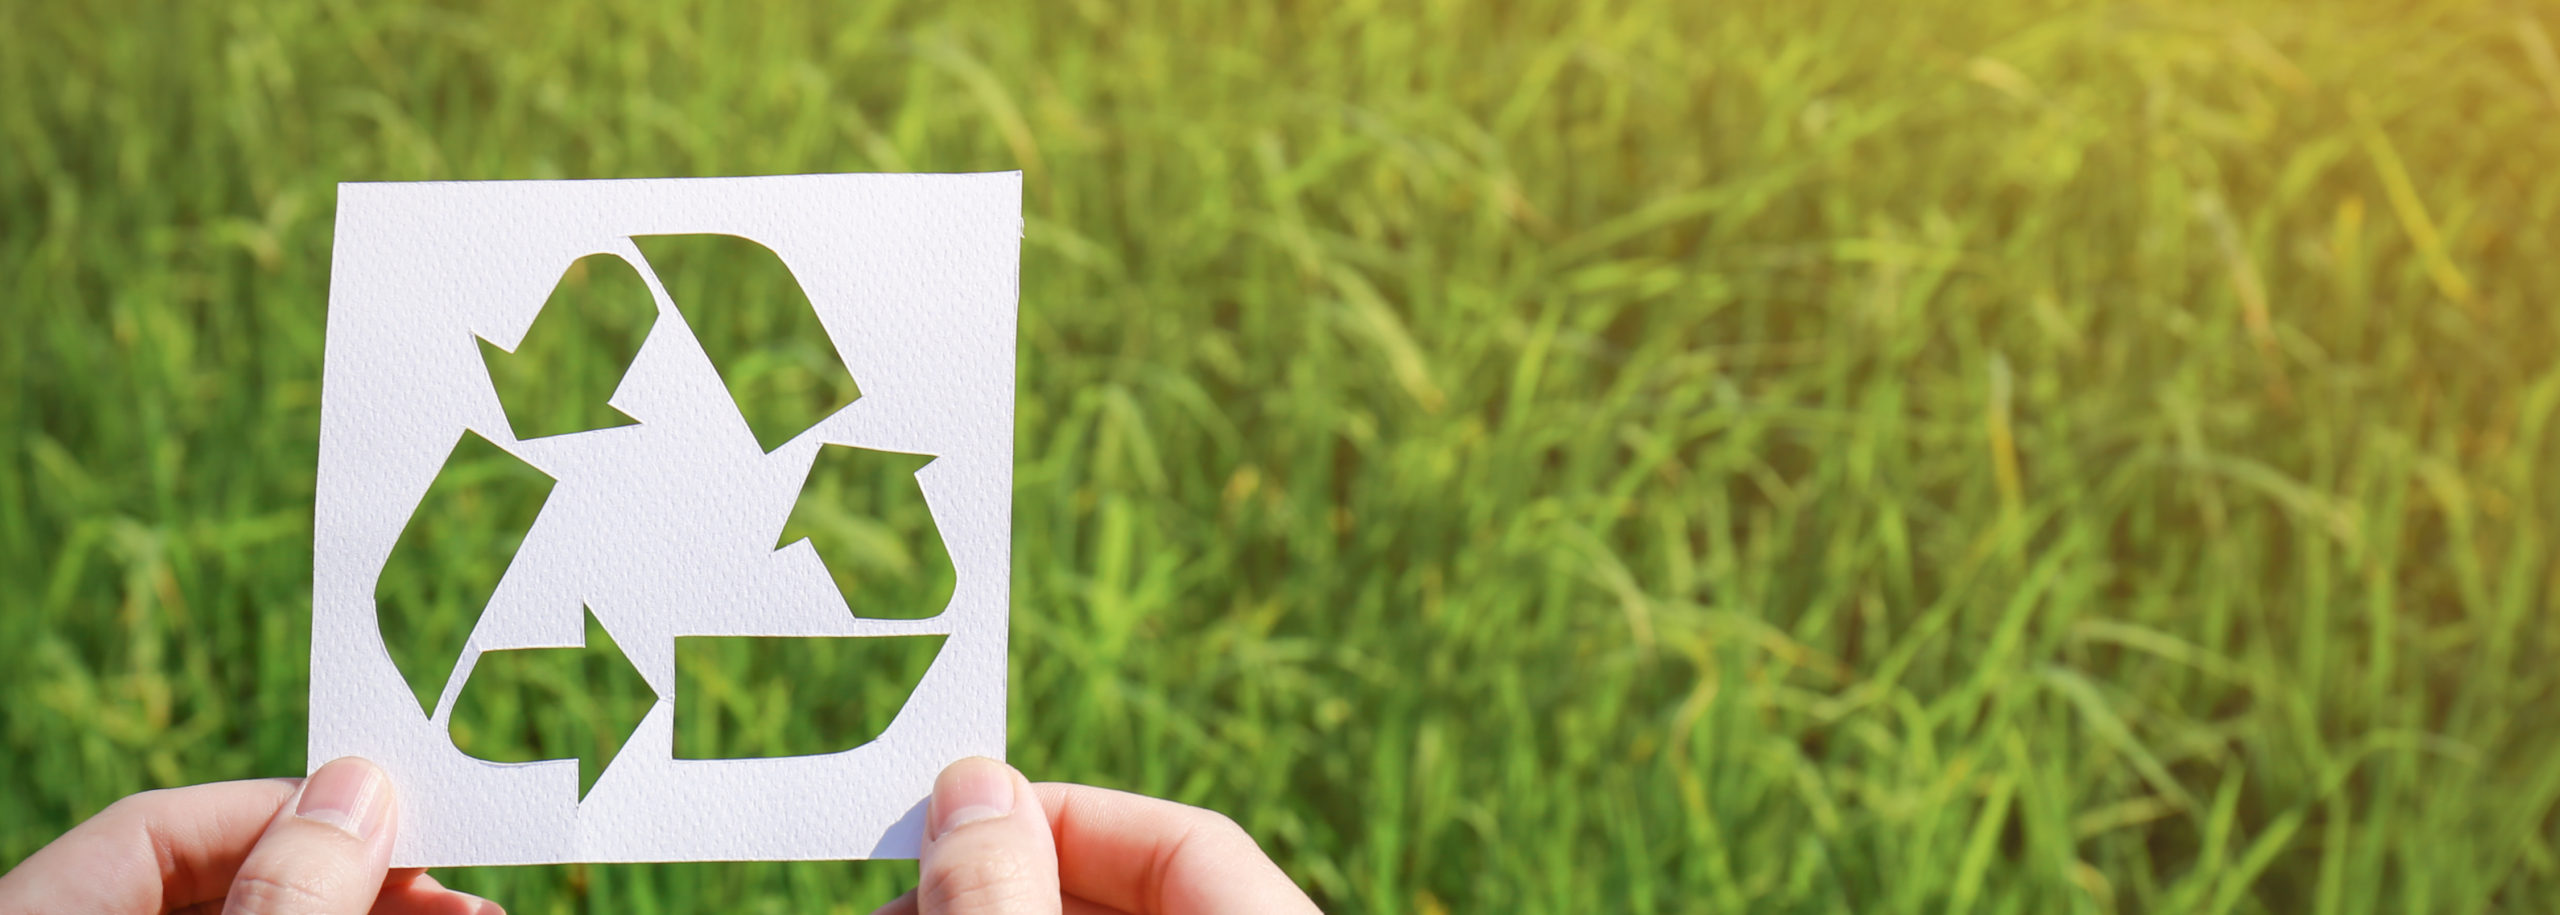

### Analyzing dataset

We will be exploring a dataset to measure the impact on global pollution accross different countries. Then we will try to predict a possible impact in the gross domestic product. This dataset was taken form Kaggle (https://www.kaggle.com/datasets/zvr842/global-pollution-by-counties).

In [1]:
#First we'll be importing some libraries to work with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and read dataset
country_data = pd.read_csv('country_level_data.csv', index_col='country_name')
# country_data = pd.read_csv('country_level_data.csv')
country_data.head(10)

,region_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
country_name,,,,,,,,,,,,,,,,,,,,,
Aruba,LCN,35563.312500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.00,NaN,NaN
Afghanistan,SAS,2057.062256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
Angola,SSF,8036.690430,51.80,6.70,4.40,11.50,11.90,13.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ECS,13724.058590,51.40,4.50,4.80,15.21,9.90,9.60,NaN,4.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
Andorra,ECS,43711.800780,31.20,8.20,2.60,11.60,35.10,11.30,NaN,NaN,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.90,NaN,NaN
United Arab Emirates,MEA,67119.132810,39.00,4.00,3.00,10.00,25.00,19.00,NaN,NaN,...,NaN,NaN,9.0,62.0,NaN,20.0,NaN,NaN,NaN,NaN
Argentina,LCN,23550.099610,38.74,3.16,1.84,15.36,13.96,14.61,1.26,1.09,...,8.90,NaN,NaN,22.6,NaN,6.0,62.5,NaN,NaN,Other
Armenia,ECS,11019.838870,57.00,3.20,3.40,17.40,6.70,11.40,0.30,0.60,...,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,Other
American Samoa,EAS,11113.442380,19.70,3.40,7.90,25.60,26.40,12.80,4.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At first glance we can identify there's some missing data accross different columns, represented as 'NaN', we'll be handling this information in the most efficient way to avoid losing precious information.
First we will be checking the percentage of missing values from dataset

In [3]:
#Let us separate this column as for now we won't be using it
country_data = country_data.drop(columns=['region_id'], axis=0)
# country_data = country_data.drop(columns=['region_id'], axis=1)

print('This is the percentage of data missing accross the different columns:\n(the lower the better)\n',
    country_data.isna().mean().mul(100))

This is the percentage of data missing accross the different columns:
(the lower the better)
 gdp                                                                                       0.460829
composition_food_organic_waste_percent                                                   18.894009
composition_glass_percent                                                                21.198157
composition_metal_percent                                                                21.658986
composition_other_percent                                                                19.354839
composition_paper_cardboard_percent                                                      18.894009
composition_plastic_percent                                                              19.354839
composition_rubber_leather_percent                                                       75.576037
composition_wood_percent                                                                 70.506912
composition_yar

As we can see a huge percentage of data is not present, due different conditions in the countries listed.
We will be working with some of the columns with the most content, we will be selecting columns with at least 50% of the data.

### Identifying the Data

We will be inspecting our feature types and how are they represented

In [4]:
#We'll do a copy of the data to handle it more efficiently.
data = country_data.copy()

#Function to select columns with lower values
def clean_data(df):
    columns = []
    # Iterate through the list of columns with previous percentage
    for i in range(len(df.columns)):
        v = (df.isna().mean().mul(100))
        if v[i] > 50:
            columns.append(v.keys()[i])
    #Drop the list of columns
    df = df.drop(columns, axis=1)    
    return df

In [5]:
# This will seapare the dataset from columns with high 'null' values and will assign to the same dataset
data = clean_data(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, Aruba to Zimbabwe
Data columns (total 16 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   gdp                                                                             216 non-null    float64
 1   composition_food_organic_waste_percent                                          176 non-null    float64
 2   composition_glass_percent                                                       171 non-null    float64
 3   composition_metal_percent                                                       170 non-null    float64
 4   composition_other_percent                                                       175 non-null    float64
 5   composition_paper_cardboard_percent                                             176 non-null    float64
 6   composition_pl


For a better understanding of our dataset we will be renaming the column titles, in a shorter and simpler way

In [6]:
# List with new column names
nnames = ['gdp', 'organic_waste_pct', 'glass_waste_pct', 'metal_waste_pct', 'other_waste_pct', 'cardboard_waste_pct', 
          'plastic_waste_pct', 'system_for_waste_mgmt', 'national_regulations_agency', 'national_waste_mgmt_law', 
          'rules_and_regulations', 'population', 'special_waste_tons_year', 'hazardous_waste_tons_year', 
          'total_msw_tons_year', 'recycling_percent'         
         ]

df_columns = data.columns
titles_dict = {key:val for key, val in zip(df_columns, nnames)}

data.rename(columns=(titles_dict),inplace=True)

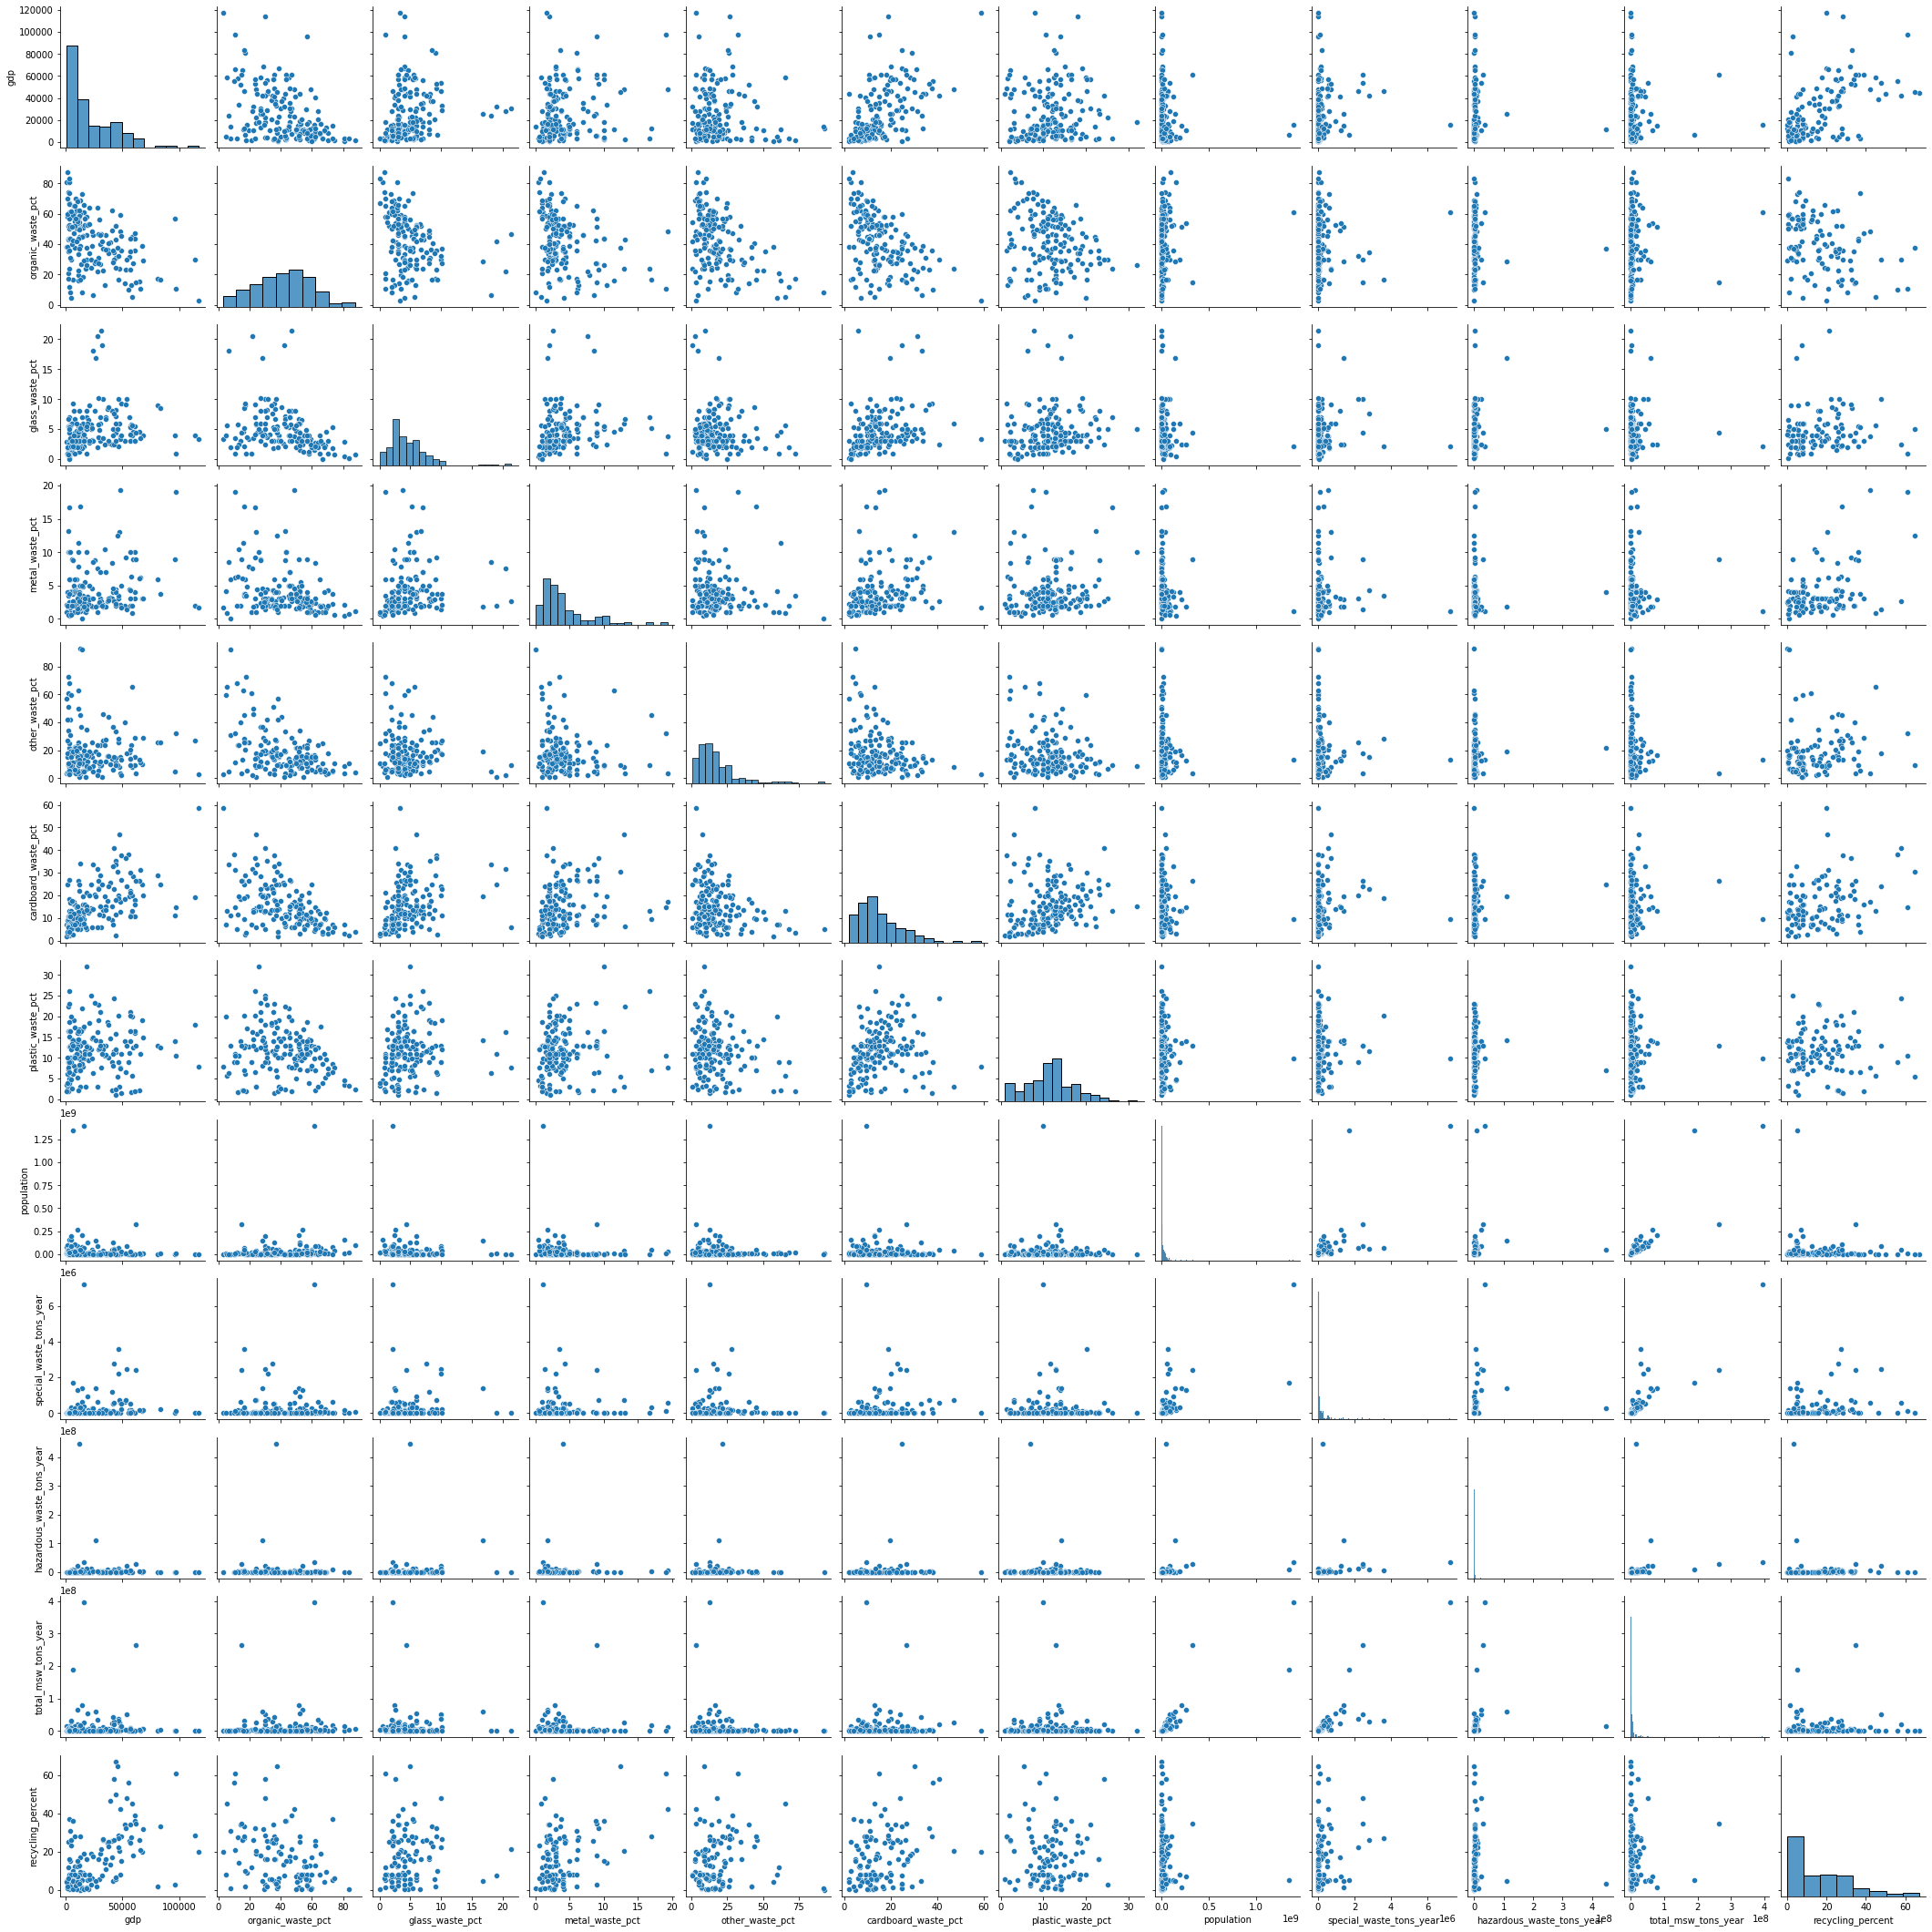

In [7]:
# This will display the data with missing values and outliers
sns.pairplot(data)

### Handling Missing Values

The type of data missing in these columns are a mix of both categorical and numerical. Some of those values seems like were not collected for different reasons. One could be a lack of records tracking percentages of waste type produced, and the second type has to do with agencies and regulations in charge of waste handling.

We will be treating missing values in a different way for the numerical and categorical data. First we will be selecting the categorical columns. 

In [8]:
# Checking a column with object type to confirm data
print('Value types found in categorical columns:\n',
      data.rules_and_regulations.value_counts())
print('-------------------------------------------')
# data.rules_and_regulations.unique()
cat_columns = [name for name in data.columns if data[name].dtype == 'object']
for col in data[cat_columns]:
    print(col, ':', len(data[col].unique()), 'values')

Value types found in categorical columns:
 Yes     116
No       42
None      4
Name: rules_and_regulations, dtype: int64
-------------------------------------------
system_for_waste_mgmt : 4 values
national_regulations_agency : 4 values
national_waste_mgmt_law : 4 values
rules_and_regulations : 4 values


We can see as they seem to handle 4 values, categorized as **'Yes'**, **'No'**, **'None'** and the missing values **'NaN'**. 
In this case we can handle the data in a more efficient way, we can assign them as a binary category to these columns and mark them as **yes = 1** and **no = 0** then, we can join the 'None' and 'NaN' values to the 0 value.

In [9]:
# Making a copy with data selected
modified_data = data.copy()

#Descriptive function to fill missing values with 'yes', 'no' values to complete missing data
def encode_values(df, column):
    new_values = {'yes': 1, 'no': 0}
    category = df[column].astype('category')
    lowecase = category.str.lower()
    replace = lowecase.replace('none', 'no', regex=True)
    result = replace.fillna('no')
    result = result.map(new_values)
    df[column] = result
    
    return df
 
# Iterate over the list with the function
for i in range(len(cat_columns)):
    df = encode_values(modified_data, cat_columns[i])

#### Data imputation 
Regarding the numerical values, since the data seems to be missing completely at random. We will be performing a random sample imputation with each of the columns. 

In [10]:
# Function to sample random value and insert it into the column
def num_imputation(df, column):
    random_sample = df[column].dropna().sample(df[column].isnull().sum(), random_state=0)
    random_sample.index = df[df[column].isnull()].index
    df.loc[df[column].isnull(), column] = random_sample
    return df

num_columns = [name for name in modified_data.columns if modified_data[name].dtype =='float64']

for i in range(len(num_columns)):
    df = num_imputation(modified_data, num_columns[i])

In [11]:
modified_data.head()

,gdp,organic_waste_pct,glass_waste_pct,metal_waste_pct,other_waste_pct,cardboard_waste_pct,plastic_waste_pct,system_for_waste_mgmt,national_regulations_agency,national_waste_mgmt_law,rules_and_regulations,population,special_waste_tons_year,hazardous_waste_tons_year,total_msw_tons_year,recycling_percent
country_name,,,,,,,,,,,,,,,,
Aruba,35563.312500,16.7,3.0,13.15,9.32,18.9,3.0,0,1,1,1,103187,1600.0,6.601802e+05,8.813202e+04,11.00
Afghanistan,2057.062256,21.8,1.0,1.38,9.30,7.0,16.5,0,1,1,1,34656032,20000.0,1.538000e+06,5.628525e+06,19.03
Angola,8036.690430,51.8,6.7,4.40,11.50,11.9,13.5,0,0,1,1,25096150,92000.0,1.100000e+08,4.213644e+06,34.00
Albania,13724.058590,51.4,4.5,4.80,15.21,9.9,9.6,0,1,1,1,2854191,20000.0,5.714820e+03,1.087447e+06,22.26
Andorra,43711.800780,31.2,8.2,2.60,11.60,35.1,11.3,0,1,1,1,82431,1409.0,1.788000e+03,4.300000e+04,4.90


#### Feature selection
Based on the previous information and having handled our missing values, we will be selecting our most useful features in the data selection, first we will be separating our numerical data from the categorical, as they are number based we will be selecting the columns manually

In [12]:
#For now we will be selecting our numerical values only
cat_cols=['system_for_waste_mgmt', 'national_regulations_agency', 'national_waste_mgmt_law', 'rules_and_regulations']
X = modified_data.drop(columns=cat_cols)

<AxesSubplot:>

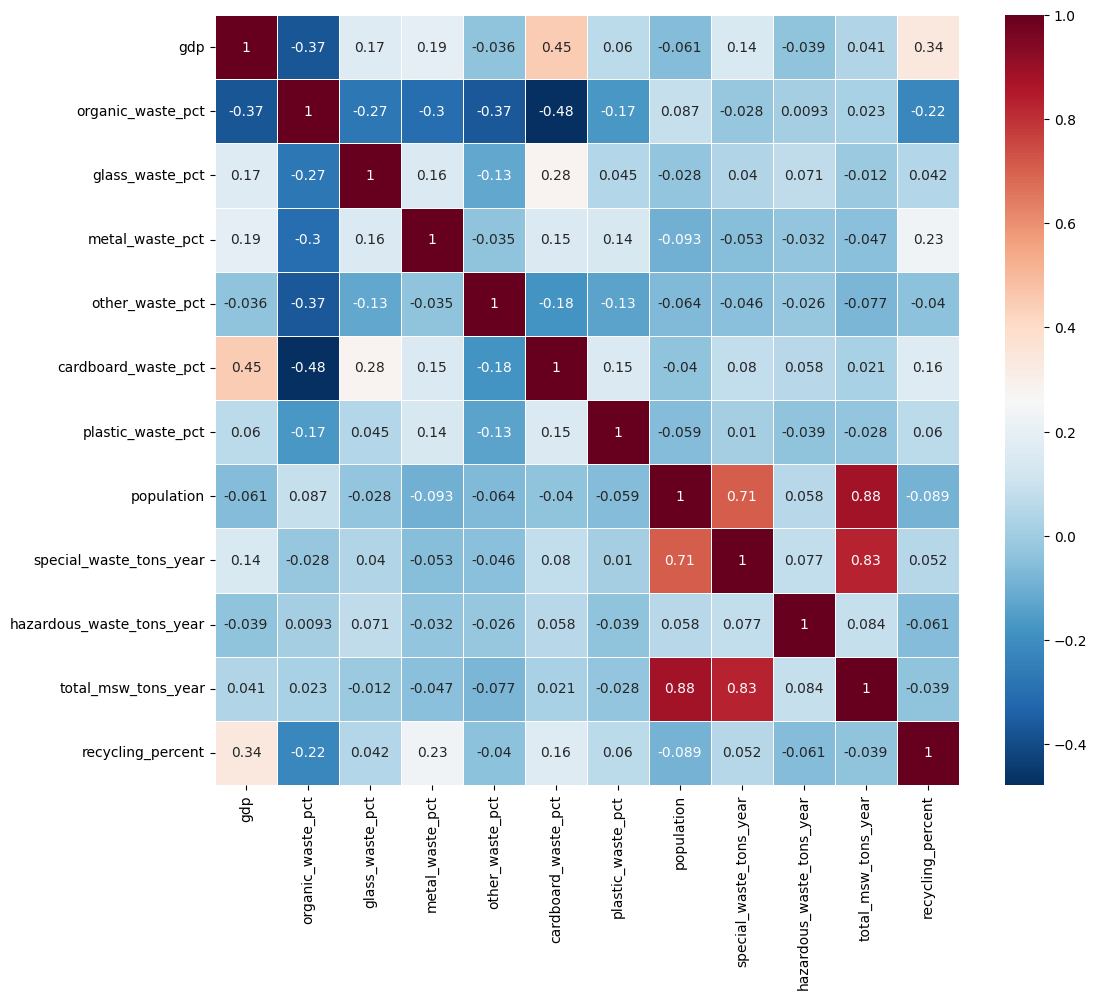

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, linewidths=0.7, cmap="RdBu_r")

We can see few correlation between some features and the gdp, let us identify if there are some outliers which could be impacting the data, and if so we would need to handle them first

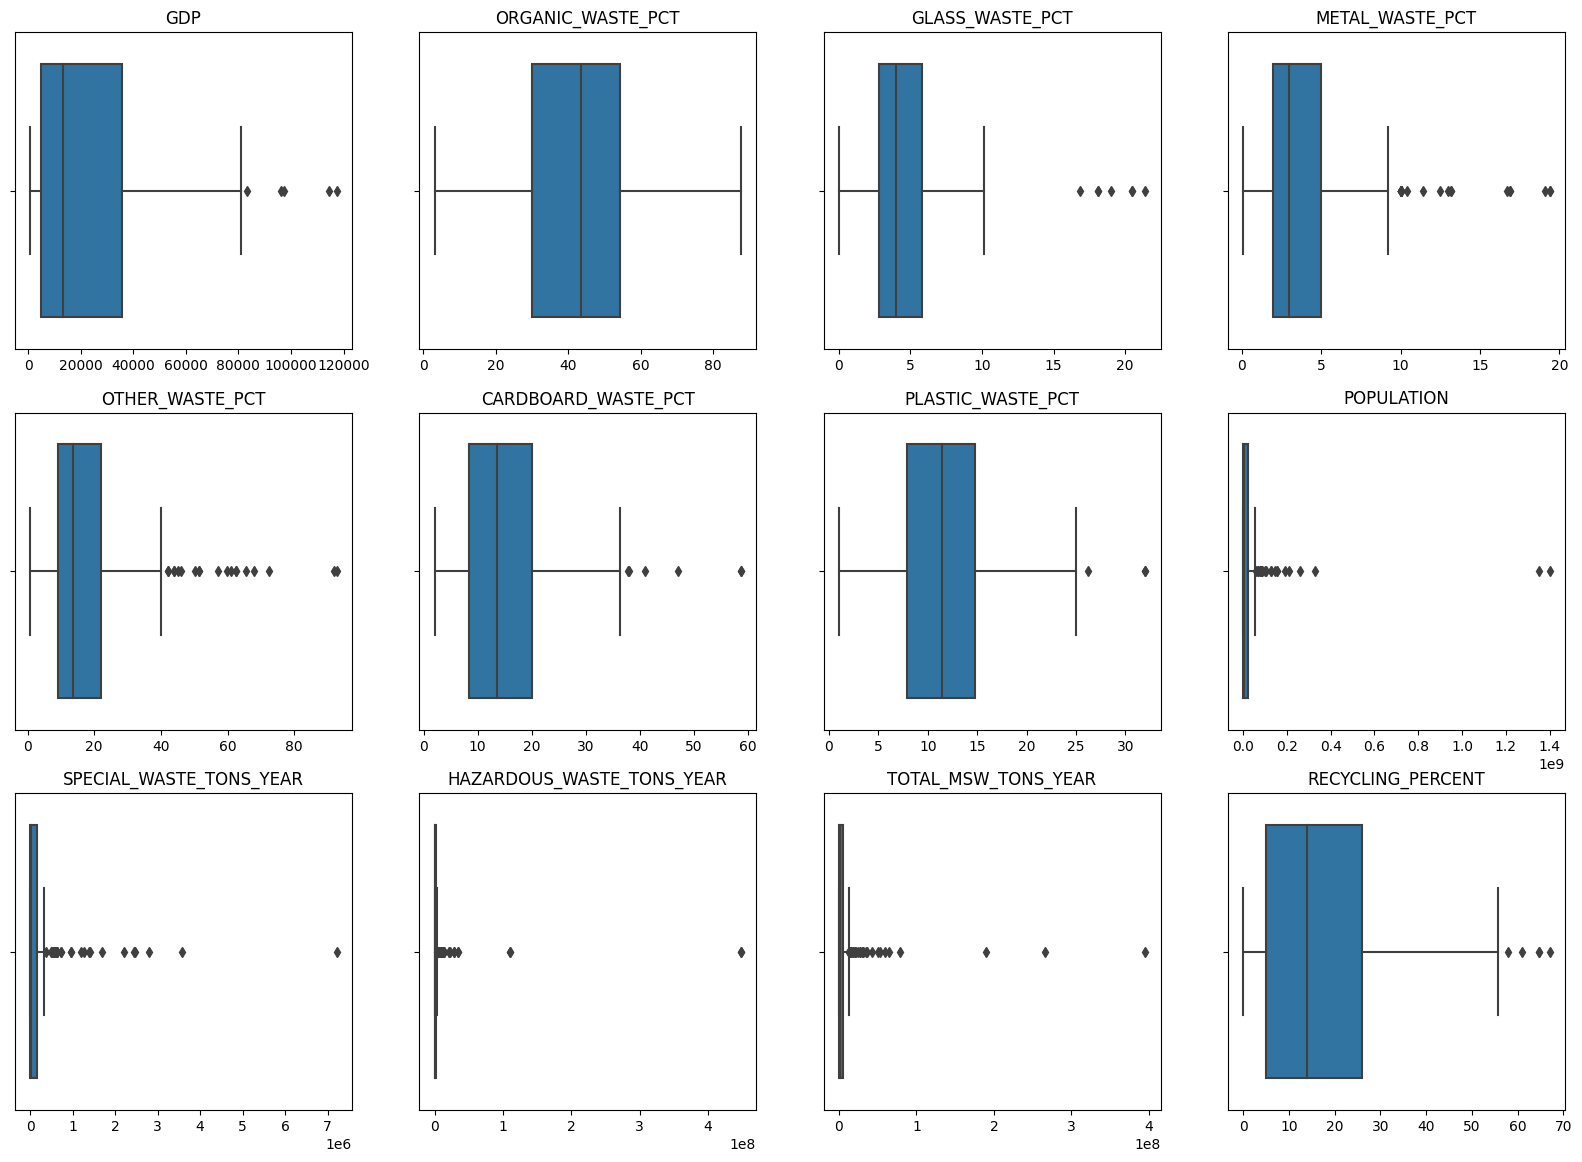

In [14]:
# Let us compare the different charts through a box plot for each feature
plt.figure(figsize=(20, 14))

for i, col in enumerate(X.columns):
    ax = plt.subplot(3,4, i+1)
    sns.boxplot(x=X[col])
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

We can identify there are several features with some outliers, this will make our data to be right skewed.

#### Treating outliers
Let us see how the data is distributed among the different features

In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,217.0,2.255062e+04,2.265461e+04,822.610474,4783.635742,1.320771e+04,3.556331e+04,1.173356e+05
organic_waste_pct,217.0,4.175109e+01,1.765694e+01,3.100000,30.000000,4.360000e+01,5.440000e+01,8.760000e+01
glass_waste_pct,217.0,4.751131e+00,3.491984e+00,0.000000,2.800000,4.000000e+00,5.830000e+00,2.140000e+01
metal_waste_pct,217.0,4.351165e+00,3.663438e+00,0.100000,2.000000,3.000000e+00,5.000000e+00,1.938000e+01
other_waste_pct,217.0,1.800153e+01,1.550165e+01,0.800000,9.000000,1.378000e+01,2.200000e+01,9.270000e+01
cardboard_waste_pct,217.0,1.554047e+01,9.691706e+00,2.000000,8.400000,1.357000e+01,2.000000e+01,5.870000e+01
plastic_waste_pct,217.0,1.170537e+01,5.750206e+00,1.000000,7.900000,1.144000e+01,1.477000e+01,3.200000e+01
population,217.0,3.364389e+07,1.365838e+08,11097.000000,746221.000000,5.737723e+06,2.120300e+07,1.400050e+09
special_waste_tons_year,217.0,2.250268e+05,6.712531e+05,10.000000,5900.000000,2.300000e+04,1.500000e+05,7.211000e+06
hazardous_waste_tons_year,217.0,7.332377e+06,4.416629e+07,4.920000,18172.490000,2.497550e+05,1.538000e+06,4.480000e+08


In [16]:
# function to treat outlier through IQR
def upd_outlier(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    # Calculate interquantile range
    iqr = q3 - q1
    # Select highest value calculated on the by a third of the iqr and replacing it on dataset
    up_q = q3 + (iqr*3)
    df.loc[df[feature] >= up_q, feature] = up_q
    return df 

In [17]:
skewed_cols = ['gdp','metal_waste_pct', 'other_waste_pct', 'cardboard_waste_pct', 'plastic_waste_pct', 
               'population', 'special_waste_tons_year', 'hazardous_waste_tons_year', 'total_msw_tons_year']

for i in range(len(skewed_cols)):
    outlier = upd_outlier(X, skewed_cols[i])

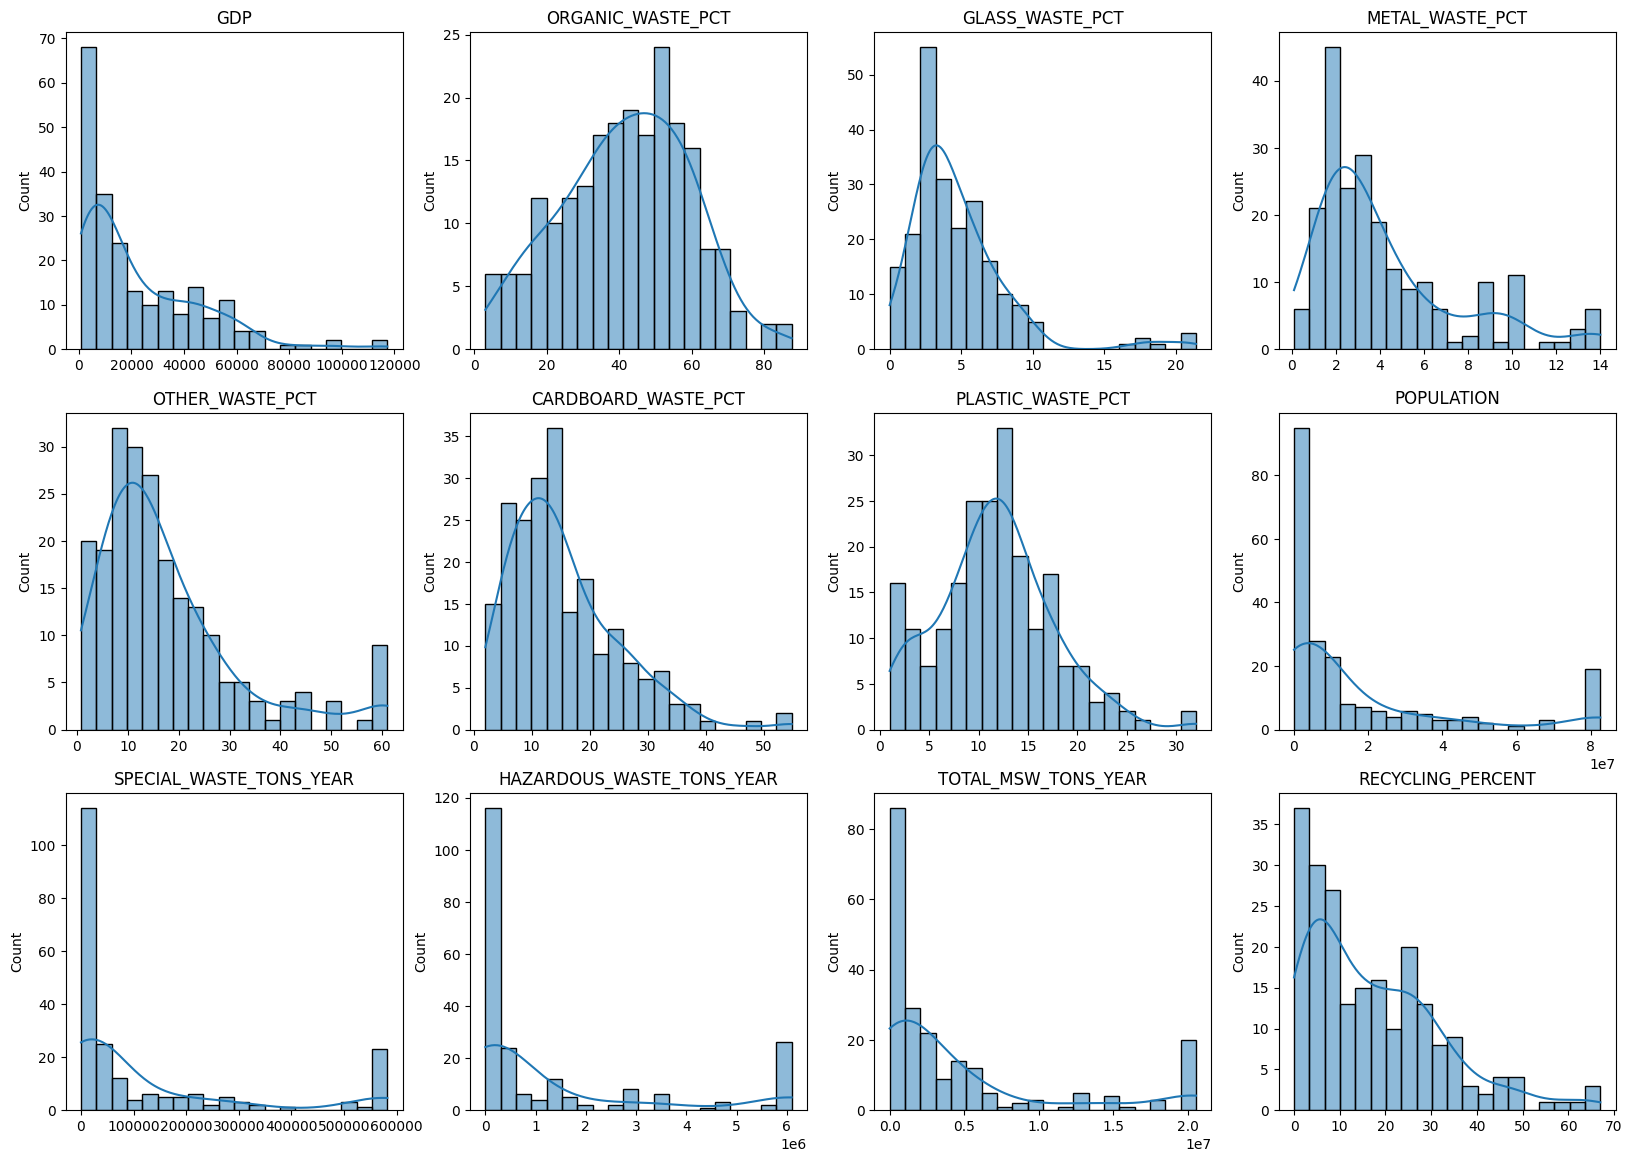

In [18]:
plt.figure(figsize=(20, 14))

for i, col in enumerate(X.columns):
    ax = plt.subplot(3,4, i+1)
    sns.histplot(x=X[col], bins=20, kde=True)
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

Altough the data is still right skewed, it has been adjusted for most of the features to properly distribute the data

In [19]:
#Separating our gdp column as this will be our target column
y = X.pop('gdp')

Next we will be selecting the most important features, since there seems to be a correlation between them we will be running a Mutual Information selection to better describe the relationship between them and select the most influential.

In [20]:
from sklearn.feature_selection import mutual_info_regression

def mi_score(df, target):
    mi_res = mutual_info_regression(df, target)
    mi_res = pd.Series(mi_res, name='MI Score', index=df.columns)
    mi_res = mi_res.sort_values(ascending=False)
    return mi_res

score = mi_score(X, y)
score

cardboard_waste_pct          0.162867
glass_waste_pct              0.127227
special_waste_tons_year      0.101793
total_msw_tons_year          0.097993
plastic_waste_pct            0.069375
organic_waste_pct            0.069233
population                   0.046959
recycling_percent            0.033139
other_waste_pct              0.032914
metal_waste_pct              0.029403
hazardous_waste_tons_year    0.010754
Name: MI Score, dtype: float64

In [32]:
# Selection of the first 6 features to work with
mi_columns = ['cardboard_waste_pct', 'glass_waste_pct', 'special_waste_tons_year', 'total_msw_tons_year',
             'plastic_waste_pct', 'organic_waste_pct']

### Training a model
#### Linear regression
We will be spliting our data in training and test so we can predict the values of gdp and its relationship with the previously selected columns

In [33]:
#Library to split data into training and validation and calculate mean absolute error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X[mi_columns], y, random_state=5)
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [35]:
print(
    'Train score:\t', lr.score(X_train, y_train),
    'Test score:\t', lr.score(X_test, y_test)
     )

Train score:	 0.31871525026914116 Test score:	 0.13819142215227753


It seems the model is not making a good prediction of the value, this is also due to the low correlation between the values. We can take a different approach by using mean/median values with the missing data.

C:\Users\steve\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp'>

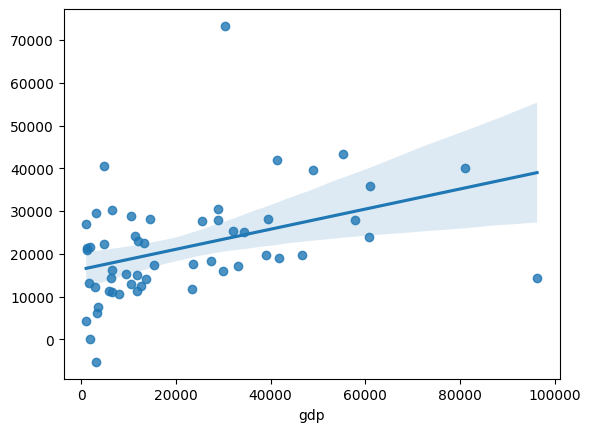

In [40]:
#This plot the prediction data vs the gdp data
sns.regplot(y_test, pred)